Optimización de modelos de regresión
===

* Ultima modificación: Marzo 9, 2021

## Tutoriales en video

* [Estimación de parametrós como un problema de optimización](https://youtu.be/j8MqAumcFUI) 9:43

* [Gradiente de la función de error](https://youtu.be/cvHgieEYnfo) 4:33

* [Implementación del método del gradiente descendente para modelos de regresión](https://youtu.be/nsjhbo2xciU) 6:29

* [Aprendizaje batch, online y gradiente descendente estocástico](https://youtu.be/xT-Q0hNw4J8) 6:36

## Material de apoyo

### Descripción del problema

Se tienen los resultados de un experimento que relacionan las variables $x$  y  $y$, a partir de los cuales se desea derivar un modelo para pronosticar $d$ en función de nuevos valores de $x$. 

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$ y = w_1 x + w_0 + e$$

a partir de la siguiente tabla de observaciones, donde $d$ es el valor real, $y$ es su aproximación usando el modelo de regresión descrito, y $e$ es el error.

In [1]:
x = [
    0.1087,
    0.2698,
    0.3765,
    0.2146,
    0.9155,
    0.0246,
    0.0221,
    0.8632,
    0.6460,
    0.2092,
    0.8567,
    0.1591,
    0.9647,
    0.6231,
    0.7460,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2008,
    0.2618,
    0.7607,
    0.1563,
    0.4424,
    0.7731,
]

d = [
    0.9519,
    1.1237,
    1.2360,
    1.0526,
    2.0743,
    0.7906,
    0.7603,
    2.0533,
    1.6887,
    1.0563,
    2.0991,
    0.8953,
    2.1917,
    1.6266,
    1.8508,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.0418,
    1.1097,
    1.7826,
    0.9711,
    1.4267,
    1.8248,
]

### Definición del problema matemático 

En un modelo de regresión se desean encontrar los parámetros $w_0$ y $w_1$ de la recta 

$$y_i = w_0 + w_1 * x_i$$

que minimicen la suma de los errores cuadráticos entre el valor real $d_i$ y el valor pronósticado $y_i$ para cada valor posible de la variable $x_i$, tal como se ilustra en la gráfica de abajo. El error $e_i$ se define como $d_i - y_i$.  

![reg](assets/sdg-1.jpg)

Esto es, se desea encontrar la combinación de parámetros $w_0$ y $w_1$ que minimice:

$$ \text{SSE} = \sum_i (d_i - y_i)^2 = \sum_i (d_i - w_0 - w_1 x_i)^2 $$

Note que en la ecuación anterior, los valores de $x_i$ y $d_i$ son constantes que corresponden a la tabla de datos presentada en la formulación del problema, mientras que las variables son $w_0$ y $w_1$, de tal forma que:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - w_0 - w_1 x_i)^2 $$

### Implementación de la función de pérdida

La ecuación anterior (squared_loss) retorna la suma del error cuadrático para diferentes valores de $w_0$ y $w_1$, calculada sobre el conjunto de datos existentes. Su implementación computacional es la siguiente: 

In [2]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def SSE(w0, w1):
    return sum([(v - w0 - w1 * u) ** 2 for u, v in zip(x, d)])

### Forma de la superficie de la función de pérdida

Ya que la función SSE() depende únicamente de los valores de $w_0$ y $w_1$, es posible graficar su forma.

In [3]:
#
# Preparación
#
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#
# Generación de una malla de puntos
# y valor del SSE en cada punto
#
W0 = np.arange(-0.5, 3.0, 0.05)
W1 = np.arange(-0.5, 3.0, 0.05)
W0, W1 = np.meshgrid(W0, W1)
F = SSE(W0, W1)

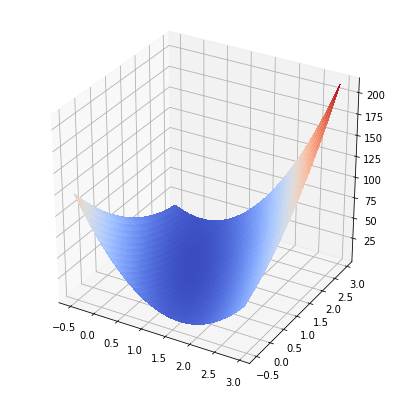

In [4]:
#
# Superficie de error
#
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(W0, W1, F, cmap=cm.coolwarm, linewidth=1, antialiased=False)

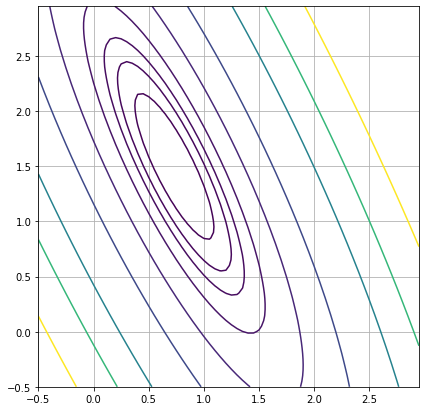

In [5]:
#
# Contorno
#
def plot_contour():
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_aspect("equal", "box")
    ax.contour(W0, W1, F, levels=[0, 1, 2, 3, 5, 10, 20, 40, 60, 90])
    ax.grid()


plot_contour()

En términos de optimización, se desea encontrar las coordenadas $(w_0, w_1)$ del punto más bajo (error mínimo) de la superficie de error.

La función de error es una cuadrática (forma de tazón) con un único punto de mínima global.

### Minimización numérica

Para realizar la optimización numérica de la función $\text{SSE}(w_0, w_1)$ se utiliza el método del gradiente descendente. Para iniciar, los parámetros $w_0$ y $w_1$ se agrupan en el vector de parámetros $\mathbf{w}=[w_0, w_1]'$, tal que:

$$\text{SSE}(w_0, w_1) = \text{SSE}(\mathbf{w})$$

Ahora, como el método es iterativo, se parte de un vector de valores aleatorios, el cual es mejorado en cada iteración, de tal forma que con los valores de $\mathbf{w}$ en la iteración $k$, $\mathbf{w}_k$ se obtienen a partir de los valores en la iteración $k-1$ como:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

donde $\mu$ se define como el tamaño de paso o coeficiente de aprendizaje. Note que

$$ \mathbf{w}_k = \left[
  \begin{array}{c}
  w_0
  \\
  w_1
  \end{array}
\right]_k
=
\left[
  \begin{array}{c}
  w_{0,k}
  \\
  w_{1,k}
  \end{array}
\right]
$$

### Gradiente algebraico

El gradiente de la función de error se calcula como:

$$\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1}) =
\frac{\partial}{\partial \mathbf{w}} \sum_i (d_i - y_{i, k-1})^2 = 
\frac{\partial}{\partial \mathbf{w}} \sum_i (d_i - w_{0,k-1} - w_{1,k-1} x_i)^2
$$

es decir,

$$
\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})= 
\left[
  \begin{array}{c}
  \frac{d}{d w_0} \text{SSE}(\mathbf{w}_{k-1})
  \\
  \frac{d}{d w_1} \text{SSE}(\mathbf{w}_{k-1})
  \end{array}
\right] 
$$

con:

$$
\begin{split}
\frac{d}{d w_0} \text{SSE}(\mathbf{w}_{k-1}) & = 
  \frac{d}{d w_0} \sum_i (d_i - w_{0,k-1} - w_{1,k-1} x_i)^2 \\ 
  & = 2 \times \sum_i (d_i - w_{0,k-1} - w_{1,k-1} x_i) \times (-1) \\
  & = - 2 \sum_i e_{i, k-1}
\end{split}
$$

y

$$
\begin{split}
\frac{d}{d w_1} \text{SSE}(\mathbf{w}_{k-1}) & = 
  \frac{d}{d w_0} \sum_i (d_i - w_{0,k-1} - w_{1,k-1} x_i)^2 \\ 
  & = 2 \times \sum_i (d_i - w_{0,k-1} - w_{1,k-1} x_i) \times (- x_i) \\
  & = - 2 \sum_i e_{i, k-1} x_i
\end{split}
$$

o equivalentemente:

$$\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1}) = 
\left[
  \begin{array}{c}
  -2 \sum_i  e_{i,k-1}
  \\
  -2 \sum_i  e_{i,k-1} x_i
  \end{array}
\right]
$$

De esta forma, la función que computa el gradiente se implementa como:

In [6]:
def gSSE(w0, w1):
    #
    # Calculo del vector de errores
    #
    e = [(v - w0 - w1 * u) for u, v in zip(x, d)]

    #
    # Cómputo de los gradientes
    #
    gw0 = -2 * sum(e)
    gw1 = -2 * sum([q * v for q, v in zip(e, x)])

    #
    # Retorna el gradiente como una tupla
    #
    return (gw0, gw1)

### Proceso iterativo de mejora de los pesos

A partir de las definiciones y cómputos anteriores, es posible implementar el proceso iterativo de mejora de los pesos usando la ecuación:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

In [7]:
def mejora(w0, w1, mu):
    #
    # Computo del gradiente para los parámetros actuales
    #
    gw0, gw1 = gSSE(w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    #  Parámetros corregidos
    #
    return (w0, w1)

### Optimización numérica usando el gradiente

Para realizar la optimización numérica, se parte de unos pesos iniciales aleatorios.


Valores encontrados

  w0 = 0.675531
  w1 = 1.643269




''

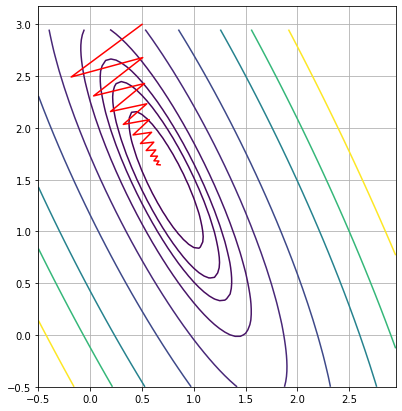

In [8]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = [w0]
history_w1 = [w1]
history_f = [SSE(w0, w1)]

for epoch in range(20):
    w0, w1 = mejora(w0, w1, 0.03)
    history_w0.append(w0)
    history_w1.append(w1)
    history_f.append(SSE(w0, w1))

print("\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}\n\n".format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
;

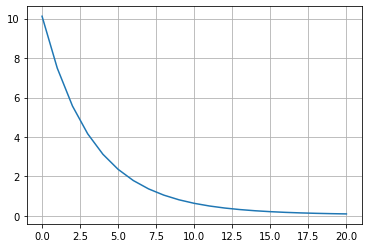

In [9]:
plt.plot(history_f, "-")
plt.grid()

''

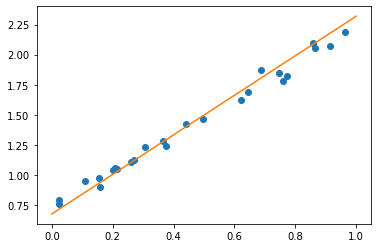

In [10]:
#
# A continuación se grafica la recta encontrada.
#

# Generación de una secuencia de puntos igualmente espaciados
z = np.linspace(0.0, 1.0)

# Cómputo de la salida del modelo
y = w0 + w1 * z

# Datos originales
plt.plot(x, d, "o")

# Pronóstico con el modelo
plt.plot(z, y, "-");

**Ejercicio.---** El valor reportado para los parámetros $w_0$ y $w_1$ es el óptimo o puede mejorarse?

### Aprendizaje Batch vs Aprendizaje Online

En aprendizaje de máquinas, el término *Batch* se refiere a que los parámetros del modelo son actualizados con base a una corrección neta computada sobre el conjunto de datos de entrenamiento; este es el caso presentado en este documento, para el cual 

$$
\begin{split}
\mathbf{w}_k 
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1}) \\
  & = \mathbf{w}_{k-1} - \mu  \sum_i \frac{\partial}{\partial \mathbf{w}} (d_i - w_{0,k-1} - w_{1, k-1} x_i)^2 
\end{split}
$$

Sin embargo, el algoritmo del gradiente también puede ser usado sobre el error instantáneo $e_{i,k}(w_{0,i,k}, w_{1,i,k}) = d_i - w_{0,i,k-1} - w_{1,i,k-1}$ que es una función dependiente del vector $\mathbf{w}$. De esta forma, la correción de los parámetros se realizar por cada patrón o ejemplo $i$:

$$
\mathbf{w}_{i,k} 
  = \mathbf{w}_{i,k-1} - \mu \frac{\partial}{\partial \mathbf{w}} e_{i,k-1}^2(\mathbf{w}_{i, k-1})
$$

La ecuación anterior simplemente significa que se computa la corrección para un patrón o ejemplo $i$ para los parámetros actuales; luego, se se actualizan los parámetros, y se procede a presentar otro patrón a la red.  


Valores encontrados

  w0 = 0.654250
  w1 = 1.642800


''

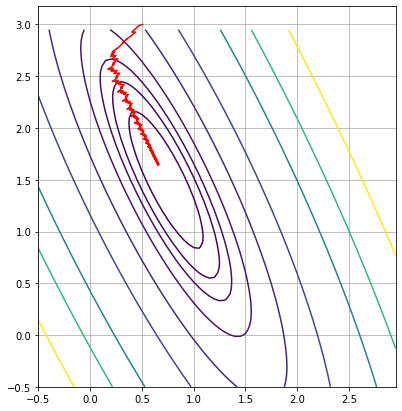

In [11]:
#
# Datos
#
x = [
    0.1087,
    0.2698,
    0.3765,
    0.2146,
    0.9155,
    0.0246,
    0.0221,
    0.8632,
    0.6460,
    0.2092,
    0.8567,
    0.1591,
    0.9647,
    0.6231,
    0.7460,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2008,
    0.2618,
    0.7607,
    0.1563,
    0.4424,
    0.7731,
]

d = [
    0.9519,
    1.1237,
    1.2360,
    1.0526,
    2.0743,
    0.7906,
    0.7603,
    2.0533,
    1.6887,
    1.0563,
    2.0991,
    0.8953,
    2.1917,
    1.6266,
    1.8508,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.0418,
    1.1097,
    1.7826,
    0.9711,
    1.4267,
    1.8248,
]

#
# Calcula el gradiente para el punto actual (u, v)
#
def gOnline(u, v, w0, w1):
    #
    # Calculo del vector de errores
    e = v - w0 - w1 * u

    #
    # Gradientes
    #
    gw0 = -2 * e
    gw1 = -2 * e * u

    return (gw0, gw1)


def mejora(u, v, w0, w1, mu):
    #
    # Computa el gradiente para los parámetros actuales
    #
    gw0, gw1 = gOnline(u, v, w0, w1)

    #
    # Corrección de los parámetros
    #
    w0 = w0 - mu * gw0
    w1 = w1 - mu * gw1

    #
    # Parámetros corregidos
    #
    return (w0, w1)


#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):

    #
    # Recorre los puntos del dataset en orden
    #
    for u, v in zip(x, d):

        w0, w1 = mejora(u, v, w0, w1, 0.03)
        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append((v - w0 - w1 * u) ** 2)

print("\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}".format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
;

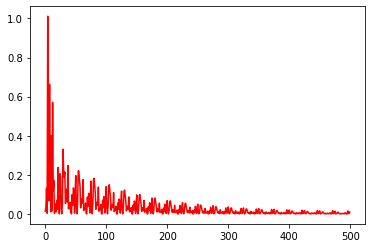

In [12]:
plt.plot(history_f, color="red")
plt.show()

### Gradiente Descendente Estocástico

El método del gradiente descendente estocástico es el método de aprendizaje online en el que los patrones se seleccionados aleatoriamente.


Valores encontrados

  w0 = 0.660416
  w1 = 1.650091



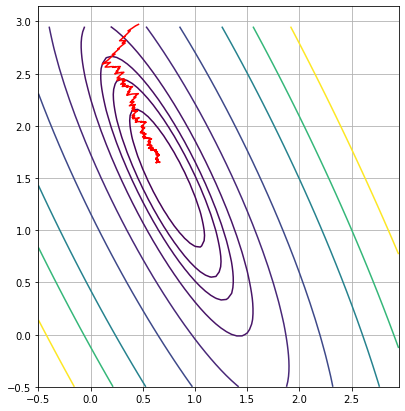

In [13]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history_w0 = []
history_w1 = []
history_f = []

for epoch in range(20):

    #
    # Recorre todos los puntos del dataset en
    # orden aleatorio
    #
    for n in np.random.choice(len(d), len(d)):

        w0, w1 = mejora(x[n], d[n], w0, w1, 0.03)
        history_w0.append(w0)
        history_w1.append(w1)
        history_f.append((v - w0 - w1 * u) ** 2)

print("\nValores encontrados\n\n  w0 = {:f}\n  w1 = {:f}\n".format(w0, w1))

plot_contour()
plt.plot(history_w0, history_w1, color="red")
plt.show()

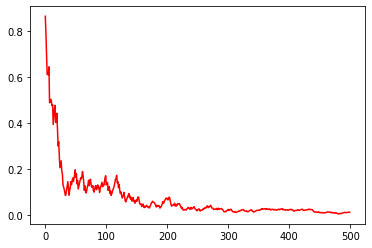

In [14]:
plt.plot(history_f, color="red")
plt.show()